New york city Taxi trip duration with Randomforest
===

 I reffered ML Workflow | LightGBM ≈ 0.37, RandomForest ≈ 0.39 notebook.
 
 <https://www.kaggle.com/quentinmonmousseau/ml-workflow-lightgbm-0-37-randomforest-0-39>

##  1. Read Csv train, test set

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip


In [2]:
train = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/train.zip",parse_dates=["pickup_datetime"])
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [4]:
test = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/test.zip",parse_dates=["pickup_datetime"])
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


## 2.Data Overview
* ### Check nan of data

In [6]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

* ### Data Describe

In [8]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


We can see in the data that the passenger_count and trip_duration are strange.

* passenger_count min = 0.000000e+00 ( This data shows the travel time of passengers and it is strange that the passenger is zero.)

* trip_duration max = 3.526282e+06 ( You can see that the Max value is significantly different from the average value of the data, 25%, 50%, and 75%. )


## 3. Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* ### Check Outliers

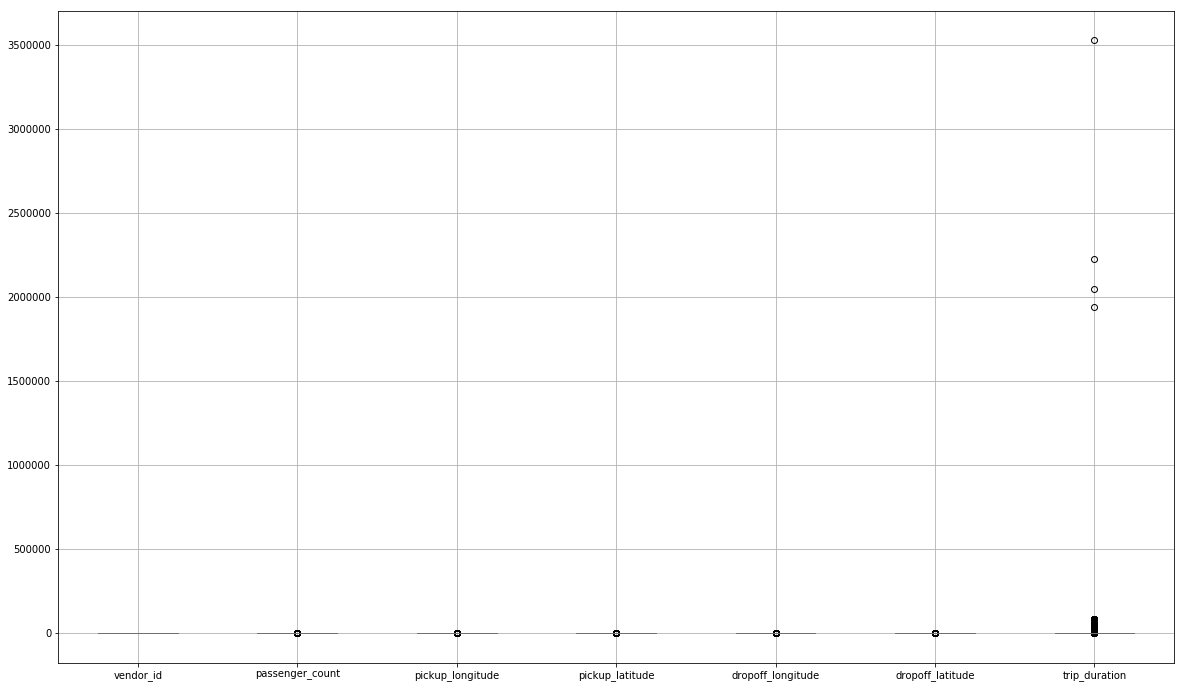

In [10]:
plt.figure(figsize=(20,12))
train.boxplot()

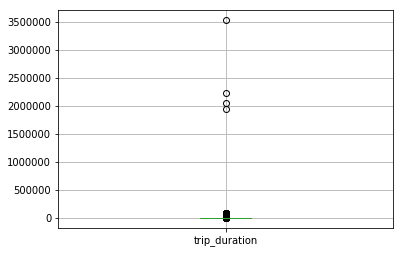

In [11]:
train.boxplot(column="trip_duration",return_type = 'axes')

In [12]:
train = train[(train.trip_duration <6000)]

In [13]:
train = train[(train.passenger_count > 0)]

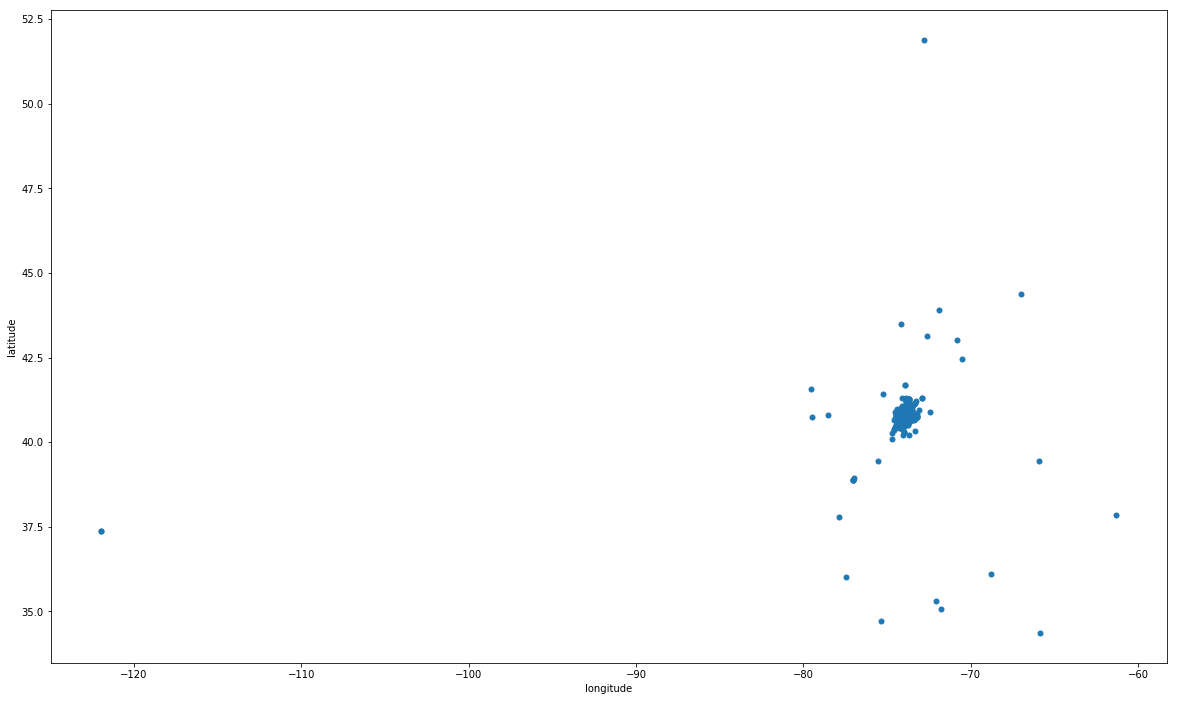

In [14]:
pickup_ln = list(train.pickup_longitude)
pickup_la = list(train.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln,pickup_la, '.', alpha =1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

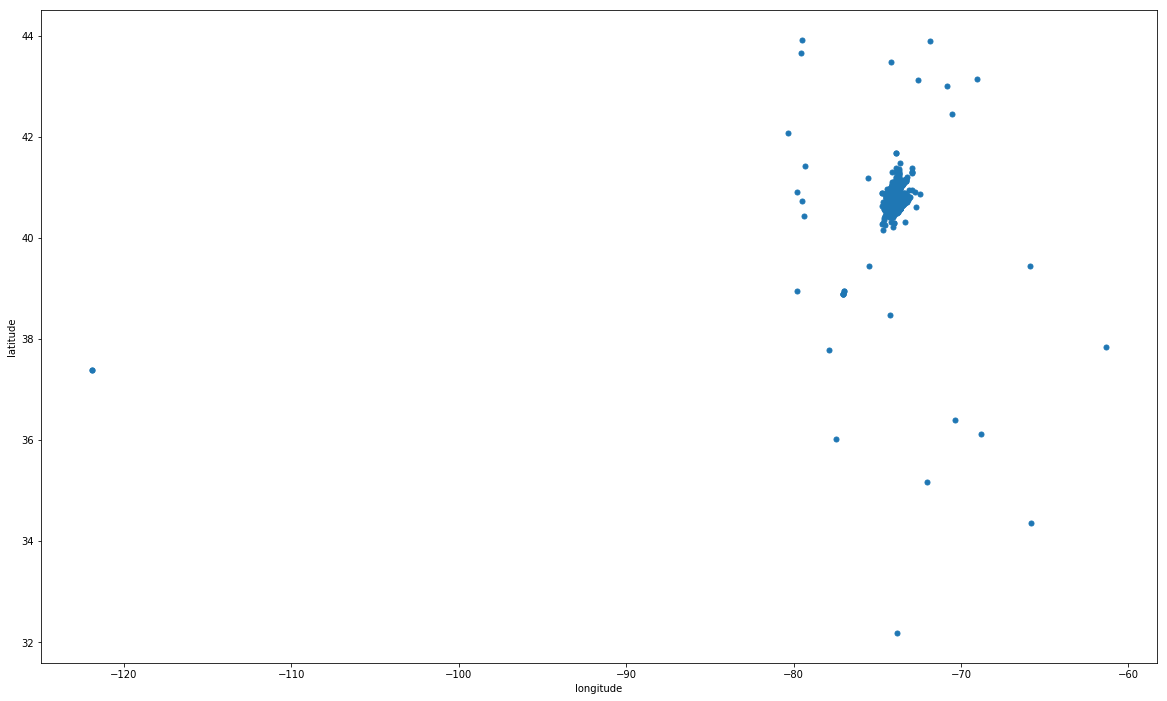

In [15]:
dropoff_ln = list(train.dropoff_longitude)
dropoff_la = list(train.dropoff_latitude)
plt.figure(figsize=(20,12))
plt.plot(dropoff_ln,dropoff_la, '.', alpha =1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [16]:
train = train[(train.pickup_longitude > -120)]
train = train[(train.pickup_latitude < 50)]
train = train[(train.dropoff_longitude > -120)]

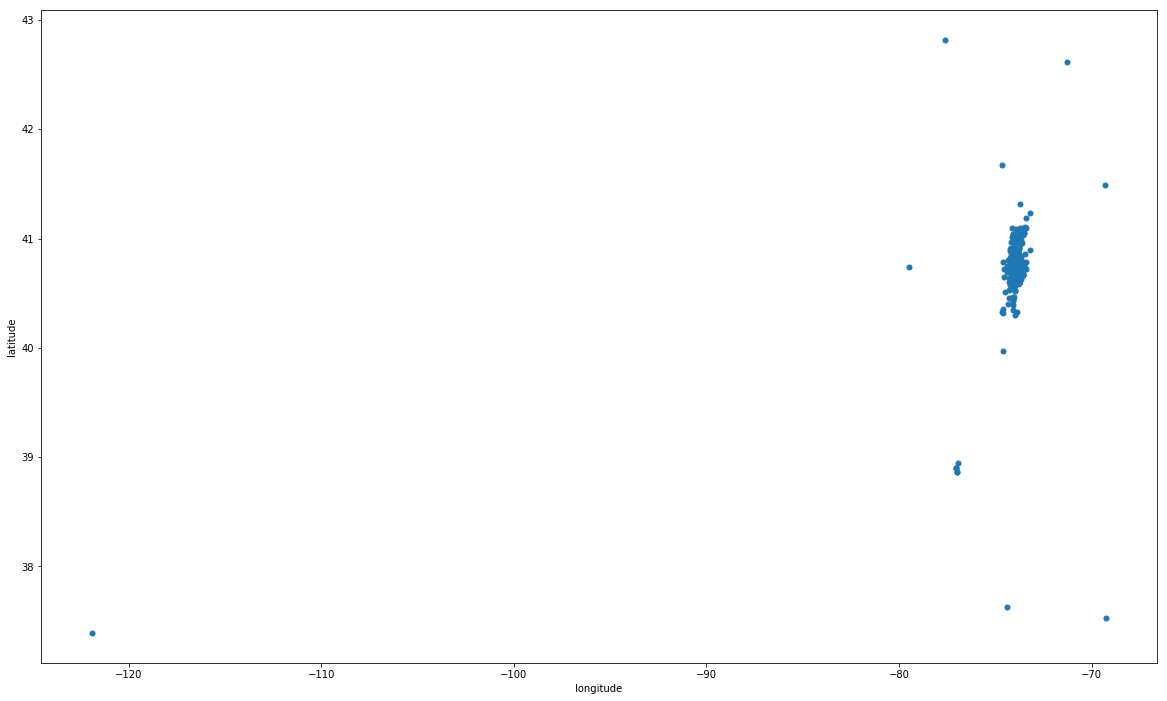

In [17]:
pickup_ln = list(test.pickup_longitude)
pickup_la = list(test.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln,pickup_la, '.', alpha =1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456015 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1456015 non-null object
vendor_id             1456015 non-null int64
pickup_datetime       1456015 non-null datetime64[ns]
dropoff_datetime      1456015 non-null object
passenger_count       1456015 non-null int64
pickup_longitude      1456015 non-null float64
pickup_latitude       1456015 non-null float64
dropoff_longitude     1456015 non-null float64
dropoff_latitude      1456015 non-null float64
store_and_fwd_flag    1456015 non-null object
trip_duration         1456015 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 133.3+ MB


## 4. Feature Engineering

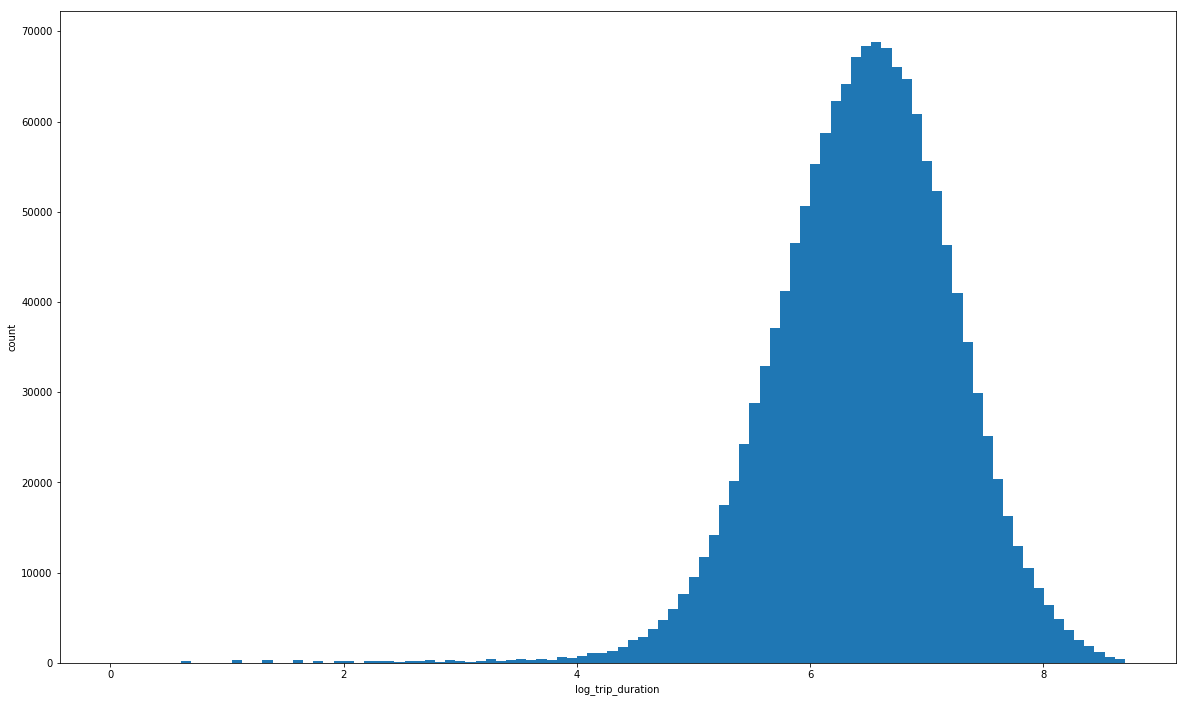

In [19]:
plt.figure(figsize =(20,12))
train['trip_duration'] = np.log(train['trip_duration'].values)
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()

In [20]:
train['year'] = train["pickup_datetime"].dt.year
train['month'] = train["pickup_datetime"].dt.month
train['day'] = train["pickup_datetime"].dt.day
train['hour'] = train["pickup_datetime"].dt.hour
train['minute'] = train["pickup_datetime"].dt.minute
train['minute_of_day'] = train["hour"]*60 + train["minute"]
train = train.drop(['minute'],axis=1)

test['year'] = test["pickup_datetime"].dt.year
test['month'] = test["pickup_datetime"].dt.month
test['day'] = test["pickup_datetime"].dt.day
test['hour'] = test["pickup_datetime"].dt.hour
test['minute'] = test["pickup_datetime"].dt.minute
test['minute_of_day'] = test["hour"]*60 + test["minute"]
test = test.drop(['minute'],axis=1)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456015 entries, 0 to 1458643
Data columns (total 16 columns):
id                    1456015 non-null object
vendor_id             1456015 non-null int64
pickup_datetime       1456015 non-null datetime64[ns]
dropoff_datetime      1456015 non-null object
passenger_count       1456015 non-null int64
pickup_longitude      1456015 non-null float64
pickup_latitude       1456015 non-null float64
dropoff_longitude     1456015 non-null float64
dropoff_latitude      1456015 non-null float64
store_and_fwd_flag    1456015 non-null object
trip_duration         1456015 non-null float64
year                  1456015 non-null int64
month                 1456015 non-null int64
day                   1456015 non-null int64
hour                  1456015 non-null int64
minute_of_day         1456015 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(3)
memory usage: 188.8+ MB


In [22]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.120297,2016,3,14,17,1044
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.496775,2016,6,12,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661056,2016,1,19,11,695
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.061457,2016,4,6,19,1172
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.075346,2016,3,26,13,810


In [23]:
train["store_and_fwd_flag"] = train["store_and_fwd_flag"].map({"Y":1,"N":0})
test["store_and_fwd_flag"] = test["store_and_fwd_flag"].map({"Y":1,"N":0})

In [24]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,2016,3,14,17,1044
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,2016,6,12,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,2016,1,19,11,695
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,2016,4,6,19,1172
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,2016,3,26,13,810


In [25]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,minute_of_day
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016,6,30,23,1439
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016,6,30,23,1439
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016,6,30,23,1439
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016,6,30,23,1439
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016,6,30,23,1439


In [26]:
def haversine (lat1,lng1,lat2,lng2):
    lat1,lng1,lat2,lng2 = map(np.radians,(lat1,lng1,lat2,lng2))
    EARTH_RADIUS = 6371 #km
    lat = lat2-lat1
    lng = lng2-lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5)**2
    dis = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return dis

In [27]:
train['distance'] = haversine(train["pickup_latitude"].values,train["pickup_longitude"],train["dropoff_latitude"],train["dropoff_longitude"])
test['distance'] = haversine(test["pickup_latitude"],test["pickup_longitude"],test["dropoff_latitude"],test["dropoff_longitude"])

In [28]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute_of_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,2016,3,14,17,1044,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,2016,6,12,0,43,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,2016,1,19,11,695,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,2016,4,6,19,1172,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,2016,3,26,13,810,1.188588


In [29]:
def degree(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng2-lng1)*np.cos(lat2) 
    x = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(lng2-lng1) 
    return np.degrees(np.arctan2(y, x))

In [30]:
train['direction'] = degree(train["pickup_latitude"].values,train["pickup_longitude"],train["dropoff_latitude"],train["dropoff_longitude"])
test['direction'] = degree(test["pickup_latitude"],test["pickup_longitude"],test["dropoff_latitude"],test["dropoff_longitude"])

In [31]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute_of_day,distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,2016,3,14,17,1044,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,2016,6,12,0,43,1.805507,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,2016,1,19,11,695,6.385098,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,2016,4,6,19,1172,1.485498,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,2016,3,26,13,810,1.188588,179.473585


In [32]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,minute_of_day,distance,direction
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016,6,30,23,1439,2.746426,-3.595224
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016,6,30,23,1439,2.759239,172.278835
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016,6,30,23,1439,1.306155,133.326248
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016,6,30,23,1439,5.269088,-150.956833
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016,6,30,23,1439,0.960842,130.260381


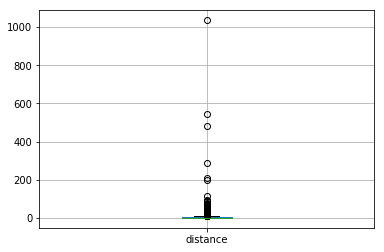

In [33]:
test.boxplot(column='distance',return_type='axes')

In [34]:
train = train[(train.distance < 200)]

In [35]:
x_train = train.drop(["id","pickup_datetime","dropoff_datetime","trip_duration"],axis=1)
x_test = test.drop(["id","pickup_datetime"],axis=1)

In [36]:
y_train = train["trip_duration"]

In [37]:
display(x_train.head(),x_test.head())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,minute_of_day,distance,direction
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,2016,3,14,17,1044,1.498521,99.970196
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,2016,6,12,0,43,1.805507,-117.153768
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2016,1,19,11,695,6.385098,-159.680165
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,2016,4,6,19,1172,1.485498,-172.737700
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,2016,3,26,13,810,1.188588,179.473585


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,minute_of_day,distance,direction
0,1,1,-73.988129,40.732029,-73.990173,40.756680,0,2016,6,30,23,1439,2.746426,-3.595224
1,1,1,-73.964203,40.679993,-73.959808,40.655403,0,2016,6,30,23,1439,2.759239,172.278835
2,1,1,-73.997437,40.737583,-73.986160,40.729523,0,2016,6,30,23,1439,1.306155,133.326248
3,2,1,-73.956070,40.771900,-73.986427,40.730469,0,2016,6,30,23,1439,5.269088,-150.956833
4,1,1,-73.970215,40.761475,-73.961510,40.755890,0,2016,6,30,23,1439,0.960842,130.260381


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 16 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null int64
year                  625134 non-null int64
month                 625134 non-null int64
day                   625134 non-null int64
hour                  625134 non-null int64
minute_of_day         625134 non-null int64
distance              625134 non-null float64
direction             625134 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(8), object(1)
memory usage: 76.3+ MB


## 5. Modeling

In [39]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,n_jobs=4)
model.fit(x_train,y_train)

CPU times: user 54min 50s, sys: 20.1 s, total: 55min 10s
Wall time: 14min 12s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
result = model.predict(x_test)
result

array([6.62246051, 6.41641635, 6.17145076, ..., 7.24798898, 7.58184298,
       7.11572815])

In [41]:
sub = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip")
sub

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [42]:
sub["trip_duration"] = np.exp(result)
sub

,id,trip_duration
0,id3004672,751.792616
1,id3505355,611.806683
2,id1217141,478.880343
3,id2150126,1240.847439
4,id1598245,369.629001
...,...,...
625129,id3008929,235.688679
625130,id3700764,1170.598921
625131,id2568735,1405.275961
625132,id1384355,1962.242007


In [43]:
sub.to_csv("trip_duration.csv",index=False)